In [127]:
import skimage.io as io 
import matplotlib.pyplot as plt
import skimage as sk
import skimage.color as clr
import matplotlib as mat
import numpy as np
import scipy as sc
import glob
from skimage.filters import try_all_threshold

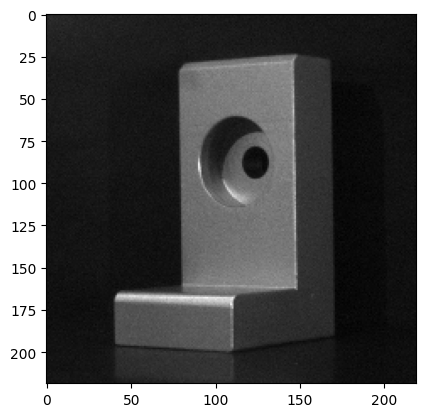

In [128]:
L = io.imread('L.png')
plt.imshow(L,cmap='gray')

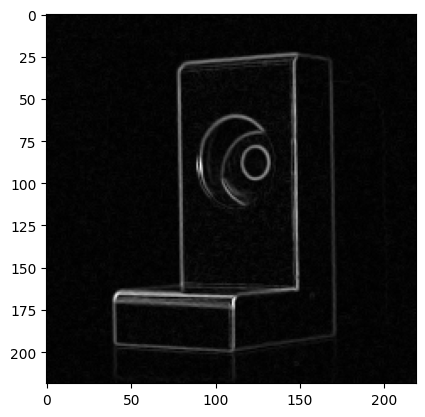

In [129]:
L_Sobel = sk.filters.sobel(L)
plt.imshow(L_Sobel,cmap='gray')

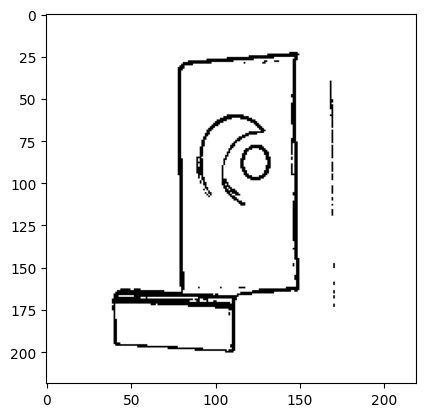

In [130]:
treshold = 0,5
otsu = sk.filters.threshold_otsu(L_Sobel,)
L_otsu = L_Sobel<otsu
plt.imshow(L_otsu,cmap='gray')

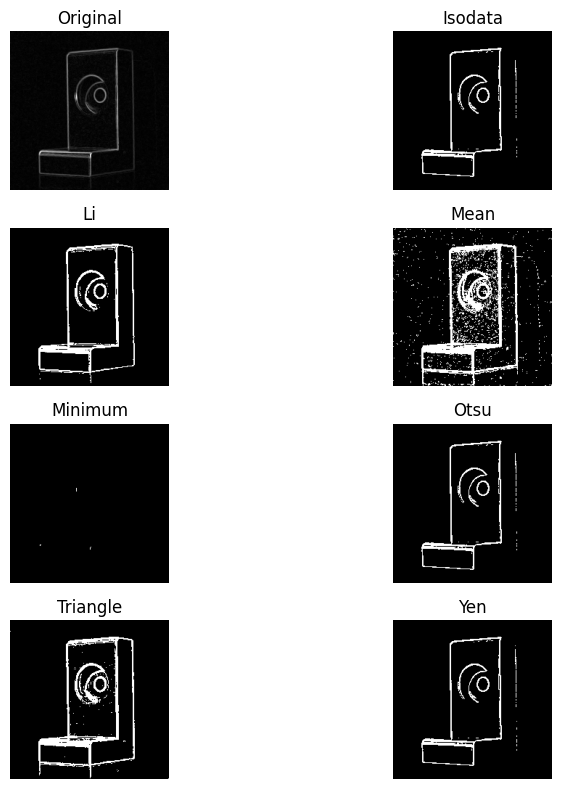

OrderedDict([('image', <Parameter "image">), ('tolerance', <Parameter "tolerance=None">), ('initial_guess', <Parameter "initial_guess=None">), ('iter_callback', <Parameter "iter_callback=None">)])


In [131]:
import inspect


fig, ax = try_all_threshold(L_Sobel, figsize=(10, 8), verbose=False)
plt.show() #ici on voit que les deux meilleurs fonctions sont Li et Isodata en revanche elle Li à était utiliser avec les paramêtres par défaut

sig = inspect.signature(sk.filters.threshold_li) #utile si plus de connection pour connaitre les paramêtres d'une fonction
print(sig.parameters)

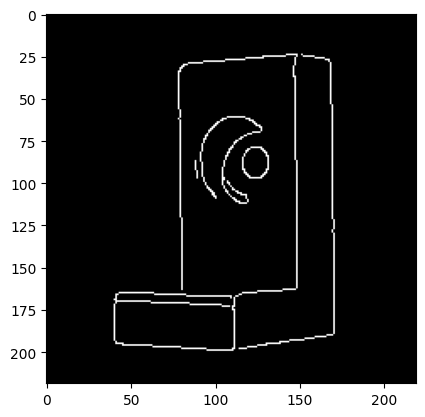

In [132]:
L_canny = sk.feature.canny(L,sigma=1.5)
plt.imshow(L_canny,cmap='gray')

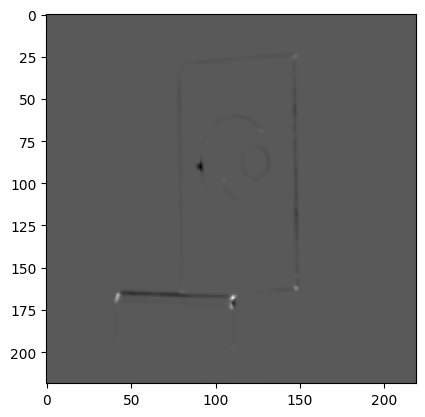

In [133]:
L_harris = sk.feature.corner_harris(L)
plt.imshow(L_harris,cmap='gray')

[[168 110]
 [167  42]
 [162 147]
 [ 25 147]
 [ 69 127]
 [ 99 105]
 [164  80]
 [197 110]
 [195  41]
 [ 34  80]
 [ 99 144]]


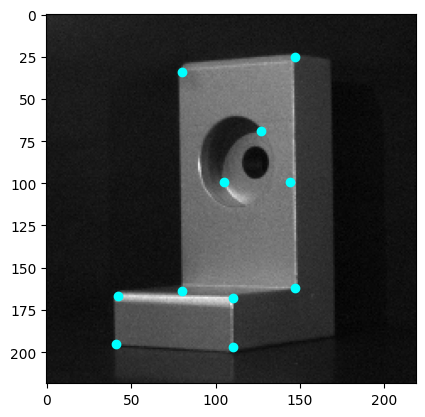

In [134]:
L_corner = sk.feature.corner_peaks(L_harris,min_distance=20,threshold_rel=0.00099)
print(L_corner)
fig, ax = plt.subplots()
ax.imshow(L, cmap=plt.cm.gray)
ax.plot(L_corner[:, 1], L_corner[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)

(-90.5, 89.5, 310.5, -310.5)

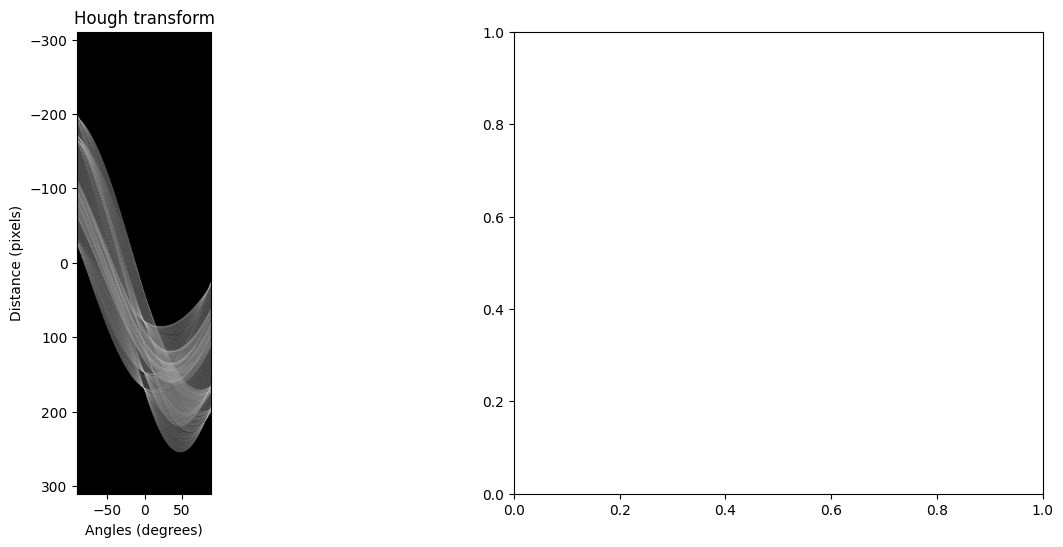

In [136]:
h, theta, d = sk.transform.hough_line(L_canny)
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[0].imshow(np.log(1 + h), extent=bounds, cmap='gray', aspect=1 / 1.5)
ax[0].set_title('Hough transform')
ax[0].set_xlabel('Angles (degrees)')
ax[0].set_ylabel('Distance (pixels)')
ax[0].axis('image')

